### **1. Data Collection**

Installing the required libraries for project:

In [ ]:
! pip install openai pandas
! pip install pycm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.8/601.8 kB 8.8 MB/s eta 0:00:00


This script generates the tweets for my project:

In [ ]:
import openai
import pandas as pd
import os.path

# OpenAI API key
api_key = 'Your Token'
openai.api_key = api_key

def generate_tweets(topic, prompt, num_tweets=10):
    tweets = []
    for _ in range(num_tweets):
        user_prompt = prompt
        response = openai.completions.create(
            model="gpt-3.5-turbo-instruct",
            prompt=user_prompt,
            max_tokens=50,
            temperature=0.7
        )
        tweet = response.choices[0].text.strip()
        tweets.append(tweet)
    return tweets

def save_tweets_to_excel(tweets, topic, prompt):
    file_name = f'tweets.xlsx'
    if os.path.exists(file_name):
        df = pd.read_excel(file_name)
        new_df = pd.DataFrame({'Tweet': tweets, 'Topic': [topic]*len(tweets), 'Prompt': [prompt]*len(tweets)})
        df = pd.concat([df, new_df], ignore_index=True)
    else:
        df = pd.DataFrame({'Tweet': tweets, 'Topic': [topic]*len(tweets), 'Prompt': [prompt]*len(tweets)})
    df.to_excel(file_name, index=False)

def main():
    topic = input("Enter the topic for tweets: ")
    prompt = input("Enter the prompt for tweets: ")
    num_tweets = int(input("Enter the number of tweets to generate: "))

    tweets = generate_tweets(topic, prompt, num_tweets)
    save_tweets_to_excel(tweets, topic, prompt)
    print(f"{num_tweets} tweets about {topic} have been generated and saved to tweets.xlsx")

if __name__ == "__main__":
    main()


Enter the topic for tweets: depression
Enter the prompt for tweets: generate a tweet about depression
Enter the number of tweets to generate: 10
10 tweets about depression have been generated and saved to tweets.xlsx


### **2. Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# function for removing stopwords
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split()
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1]
        return " ".join(clean_words)


# Data cleaning and preprocessing
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+\.com\S+', '', text)  # Remove .com domains
    text = re.sub(r'@([\w-]*)', '', text)  # Remove mentions
    text = re.sub(r'#([\w-]*)', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert text to lowercase
    return text


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download WordNet and punkt if not already downloaded
nltk.download('wordnet')
nltk.download('punkt')

def lemmatize_tweet(tweet):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(tweet)
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    lemmatized_tweet = ' '.join(lemmatized_tokens)
    return lemmatized_tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# example of removing stopwords
remove_stopwords('She enjoys reading books in the quiet afternoon.')

'She enjoys reading books quiet afternoon.'

In [ ]:
# example of lemmatization
tweet = "I am running through the fields"
lemmatized_tweet = lemmatize_tweet(tweet)
print(lemmatized_tweet)

I be run through the field


In [ ]:
import os.path

# function that applies all the preprocessing steps to the data
def clean_data(file_name):
  df = pd.read_excel(file_name)
  df.loc[df["Topic"] == "non-depression", "Topic"] = "non-diagnosed"
  # removing stopwords
  df['cleaned_tweets'] = df['Tweet'].apply(remove_stopwords)
  # cleaning data
  df['cleaned_tweets'] = df['cleaned_tweets'].apply(clean_text)
  # lemmatize data
  df['cleaned_tweets'] = df['cleaned_tweets'].apply(lemmatize_tweet)
  df['Tweet'] = df['cleaned_tweets']
  del df['cleaned_tweets']
  return df

Importing Data:

In [ ]:
df = clean_data('tweets.xlsx')

In [ ]:
df.head(5)

,Tweet,Topic,Prompt
0,life busy mind mean endless ideas constant cur...,ADHD,generate a tweet about ADHD without directly m...
1,try focus one task feel like try catch butterf...,ADHD,generate a tweet about ADHD without directly m...
2,always go constantly curious endlessly creativ...,ADHD,generate a tweet about ADHD without directly m...
3,lifes like tv fast forward constantly jump one...,ADHD,generate a tweet about ADHD without directly m...
4,life constant whirlwind thoughts buzz energy c...,ADHD,generate a tweet about ADHD without directly m...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   2100 non-null   object
 1   Topic   2100 non-null   object
 2   Prompt  2100 non-null   object
dtypes: object(3)
memory usage: 49.3+ KB


In [ ]:
df['Topic'].unique()

array(['ADHD', 'anxiety', 'depression', 'schizophrenia', 'PTSD', 'autism',
       'non-diagnosed'], dtype=object)

### **3. Data Visualization**


Figure 3 depicts the distribution of words per tweet, showcasing an average of 14.6 words and a skewness of 0.39. Interestingly, the graph exhibits a normally skewed pattern, suggesting that tweets tend to cluster around the average length. Understanding this distribution is vital for comprehending the tweet space, characterized by a maximum of 30 words per tweet and an average length of 14.6 words.

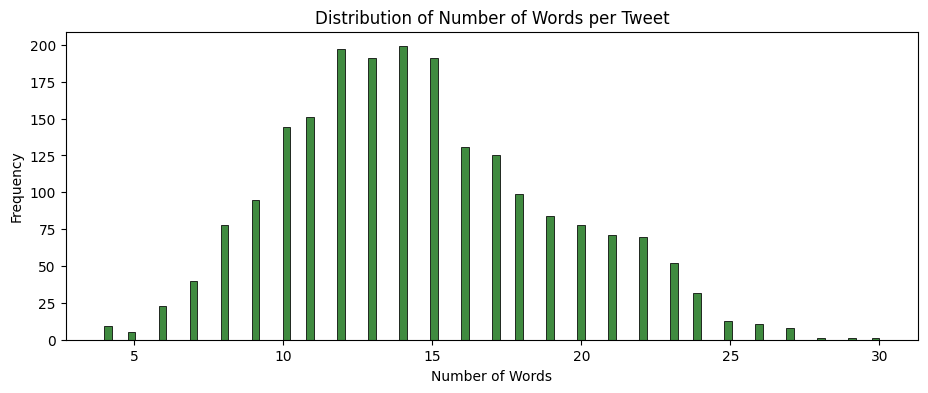

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Calculating the number of words in each tweet
word_count_per_tweet = df.Tweet.apply(lambda tweet: len(tweet.split(" ")))

# Plotting the histogram of word frequencies
plt.figure(figsize=(11, 4))
sns.histplot(word_count_per_tweet, bins=100, color='darkgreen')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words per Tweet')
plt.show()

In [ ]:
print('Average words:', word_count_per_tweet.mean())
print('Skewness:', word_count_per_tweet.skew())

Average words: 14.583333333333334
Skewness: 0.3912277311776272


In [ ]:
# calculating the percentage distribution of topics
topic_percentVal = 100* df['Topic'].value_counts()/len(df)
topic_percentVal

Topic
non-diagnosed    21.428571
depression       19.047619
ADHD             11.904762
anxiety          11.904762
schizophrenia    11.904762
PTSD             11.904762
autism           11.904762
Name: count, dtype: float64


The comparison of these percentages illustrates the distribution of topics within a dataset. Each percentage represents the proportion of occurrences of a specific topic relative to the total number of occurrences across all topics.

"non-diagnosed" comprises 21.43% of the total occurrences.
"depression" accounts for 19.05% of the total occurrences.
"ADHD", "anxiety", "schizophrenia", "PTSD", and "autism" each make up 11.90% of the total occurrences.
This comparison allows for insights into the relative prevalence of different topics within the dataset. For example, it reveals that "non-diagnosed" and "depression" are the most prevalent topics, while the other topics have relatively similar percentages, suggesting comparable frequencies within the dataset.

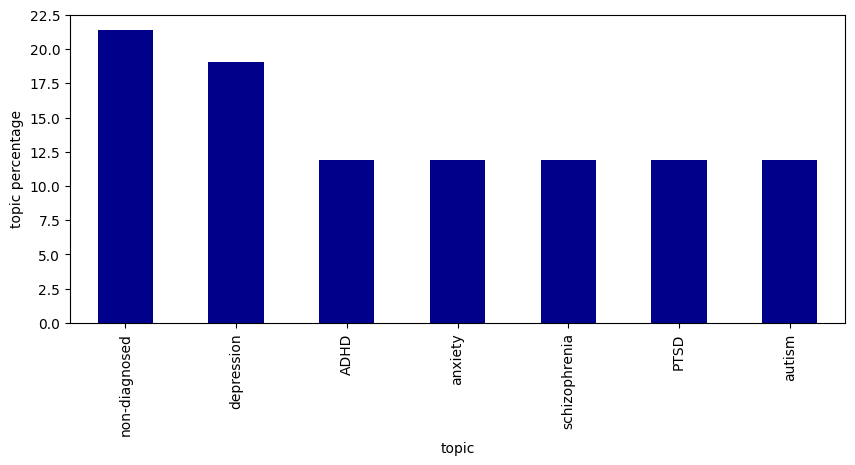

In [ ]:
# scores distribution
topic_percentVal.plot.bar(figsize=(10,4), color='darkblue')
plt.xlabel('topic')
plt.ylabel('topic percentage')
plt.show()

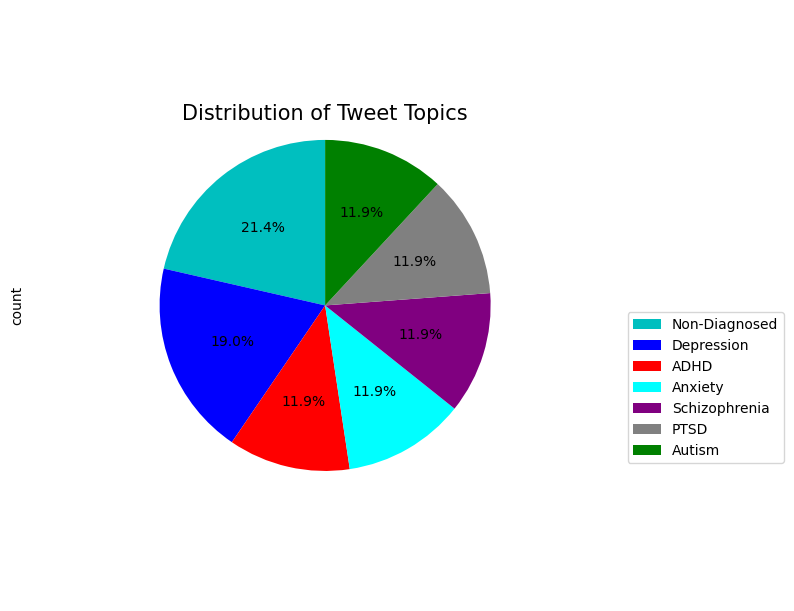

In [ ]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(figsize=(8, 8))

categories = 'Non-Diagnosed', 'Depression', 'ADHD', 'Anxiety', 'Schizophrenia', 'PTSD', 'Autism'
detonation = [0, 0, 0, 0, 0, 0, 0]
color_scheme = ["c", 'b', 'r', 'aqua', 'purple', 'gray', 'green']
text_properties = {"fontsize": 15}

# Generate the pie chart
df.value_counts('Topic').plot.pie(autopct='%0.1f%%', fontsize=10, shadow=False, radius=0.7,
colors=color_scheme, explode=detonation, startangle=90,
center=(2, 3), labels=None) # Avoid showing labels at this point

plt.title('Distribution of Tweet Topics', fontsize=15, y=0.8)
plt.legend(labels=categories, loc="upper left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
# NLP packages
import nltk  # the most famous python module for NLP techniques
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Word clouds in NLP visualization offer a visually intuitive representation of the most
frequent words in a text corpus, highlighting key themes and topics. They aid in identifying
patterns and outliers within the text, facilitating insights into content and sentiment. Additionally,
word clouds provide a concise summary of large text datasets, making them accessible to a
broader audience

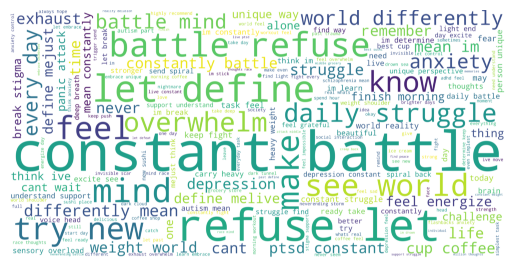

In [ ]:

# Combining all the reviews from the dataset into a single text string
combined_text = ''.join(df['Tweet'])

# Generating a word cloud using the WordCloud library and its generate() method
word_cloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
max_words=200, # Maximum number of words
background_color="white", # Background color of the word cloud image
scale=10, # Scaling between computation and drawing
width=800, # Width of the canvas
height=400 # Height of the canvas
).generate(combined_text)

plt.figure()
plt.imshow(word_cloud, interpolation="bilinear") # To make the displayed image appear smoother
plt.axis("off")
plt.show()

Showing the most frequent words:

In [ ]:
# Splitting text into word
reviews = df['Tweet'].str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
#print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

['just',
 'feel',
 'battle',
 'live',
 'like',
 'constant',
 'its',
 'let',
 'im',
 'world',
 'day',
 'struggle',
 'mind',
 'me',
 'constantly',
 'depression',
 'not',
 'try',
 'refuse',
 'define',
 'every',
 'make',
 'think',
 'mean',
 'see',
 'new',
 'life',
 'unique',
 'support',
 'understand',
 'anxiety',
 'fight',
 'find',
 'keep',
 'back',
 'weight',
 'thoughts',
 'but',
 'cant',
 'take',
 'remember',
 'the',
 'way',
 'daily',
 'overwhelm',
 'embrace',
 'break',
 'autism',
 'alone',
 'know']

### **4. Feature Extraction**

## **4.1 N-grams and Character n-grams (q-grams) examples:**


This code shows how various types of n-grams and character n-grams work from each tweet when we do feature extraction. It includes functions to extract unigrams, bigrams, trigrams, character 3-grams, 5-grams, and 7-grams, as well as word Unordered Bag-of-Words (UBT). Finally, it iterates through each tweet, printing the original tweet and the extracted n-grams and character n-grams for analysis and processing.

In [ ]:
import random

# Fake dataset of tweets about mental health
tweets = [
    "Feeling anxious today, can't seem to calm down.",
    "Just had a therapy session and feeling much better.",
    "Struggling with depression lately, need some support.",
    "Mental health is just as important as physical health."
]

# Function to extract n-grams from a given text
def extract_ngrams(text, n):
    words = text.split()
    ngrams = []
    for i in range(len(words) - n + 1):
        ngrams.append(" ".join(words[i:i+n]))
    return ngrams

# Function to extract character n-grams from a given text
def extract_char_ngrams(text, n):
    chars = list(text.replace(" ", ""))
    char_ngrams = []
    for i in range(len(chars) - n + 1):
        char_ngrams.append("".join(chars[i:i+n]))
    return char_ngrams

# Function to extract word UBT from a given text
def extract_word_ubt(text):
    words = text.split()
    word_ubt = []
    for i in range(len(words)):
        for j in range(1, 4):
            if i + j <= len(words):
                word_ubt.append(" ".join(words[i:i+j]))
    return word_ubt

# Extract unigrams, bigrams, trigrams, char 3-grams, char 5-grams, char 7-grams, and word UBT for each tweet
for tweet in tweets:
    print(f"Tweet: {tweet}")
    print("Unigrams:", extract_ngrams(tweet, 1))
    print("Bigrams:", extract_ngrams(tweet, 2))
    print("Trigrams:", extract_ngrams(tweet, 3))
    print("Char 3-grams:", extract_char_ngrams(tweet, 3))
    print("Char 5-grams:", extract_char_ngrams(tweet, 5))
    print("Char 7-grams:", extract_char_ngrams(tweet, 7))
    print("Word 1,2,3-grams (UBT):", extract_word_ubt(tweet))
    print()


Tweet: Feeling anxious today, can't seem to calm down.
Unigrams: ['Feeling', 'anxious', 'today,', "can't", 'seem', 'to', 'calm', 'down.']
Bigrams: ['Feeling anxious', 'anxious today,', "today, can't", "can't seem", 'seem to', 'to calm', 'calm down.']
Trigrams: ['Feeling anxious today,', "anxious today, can't", "today, can't seem", "can't seem to", 'seem to calm', 'to calm down.']
Char 3-grams: ['Fee', 'eel', 'eli', 'lin', 'ing', 'nga', 'gan', 'anx', 'nxi', 'xio', 'iou', 'ous', 'ust', 'sto', 'tod', 'oda', 'day', 'ay,', 'y,c', ',ca', 'can', "an'", "n't", "'ts", 'tse', 'see', 'eem', 'emt', 'mto', 'toc', 'oca', 'cal', 'alm', 'lmd', 'mdo', 'dow', 'own', 'wn.']
Char 5-grams: ['Feeli', 'eelin', 'eling', 'linga', 'ingan', 'nganx', 'ganxi', 'anxio', 'nxiou', 'xious', 'ioust', 'ousto', 'ustod', 'stoda', 'today', 'oday,', 'day,c', 'ay,ca', 'y,can', ",can'", "can't", "an'ts", "n'tse", "'tsee", 'tseem', 'seemt', 'eemto', 'emtoc', 'mtoca', 'tocal', 'ocalm', 'calmd', 'almdo', 'lmdow', 'mdown', 'down.

## **4.2 Topic Modeling examples:**

The code below performs topic modeling on a collection of text data related to our tweets to just show how these techniques work. It first transforms the text data into TF-IDF (Term Frequency-Inverse Document Frequency) vectors using the TfidfVectorizer. Then, it applies two topic modeling algorithms: Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF), each configured to extract 7 topics. The function display_topics prints the top words for each topic generated by both models. The result is a list of words representing the main themes or topics present in the text data.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF


tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['Tweet'])

# LDA
lda_model = LatentDirichletAllocation(n_components=7, random_state=42)
lda_topics = lda_model.fit_transform(tfidf)

# NMF
nmf_model = NMF(n_components=7, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf)

# Showing the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10  # Number of top words to display for each topic

print("LDA Topics:")
display_topics(lda_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)
print("\nNMF Topics:")
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)



LDA Topics:
Topic 1:
unique embrace celebrate world differences person way thats deserve make
Topic 2:
battle constant refuse live define let ptsd think past trigger
Topic 3:
help depression remember strength seek support battle sign know reach
Topic 4:
just mean differently day morning world feel finish autism ready
Topic 5:
battle live constant feel struggle mind like constantly anxiety depression
Topic 6:
like feel im light dark end stick cloud tunnel remember
Topic 7:
try just new sushi amaze best social adhd challenge sensory

NMF Topics:
Topic 1:
refuse let define battle think constant ptsd trigger past just
Topic 2:
mean differently world autism im break just change want perspective
Topic 3:
day morning finish coffee energize ready just feel cup excite
Topic 4:
like feel im weight depression remember light dark know days
Topic 5:
live struggle battle constant support understand daily constantly reality overwhelm
Topic 6:
unique embrace celebrate person differences way world dive

The code below does the same thing using a list of fake tweets to see how all the tweets on the list were divided into topics.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import CountVectorizer
import random

# Fake dataset of tweets
tweets = [
    "Feeling anxious today, can't seem to calm down.",
    "Just had a therapy session and feeling much better.",
    "Struggling with depression lately, need some support.",
    "Mental health is just as important as physical health.",
    "Exercise helps me manage stress and anxiety.",
    "Feeling overwhelmed by work, need to take a break.",
    "Practicing mindfulness meditation every day.",
    "Taking medication for my mental health condition.",
    "Feeling grateful for the support of friends and family.",
    "Reaching out for professional help was the best decision I made.",
    "Struggling to find motivation to get out of bed in the morning.",
    "Keeping a journal to track my thoughts and emotions.",
    "Talking openly about mental health can reduce stigma.",
    "Attending a support group for people with similar experiences.",
    "Learning coping strategies to deal with panic attacks.",
    "Creating a self-care routine to prioritize my mental well-being.",
    "Just finished watching a great movie!",
    "Excited to go on vacation next week.",
    "Enjoying a delicious meal with friends.",
    "Reading a fascinating book about history.",
    "Listening to my favorite music always lifts my mood.",
    "Spending quality time with family.",
    "Taking a walk in the park on a sunny day.",
    "Trying out a new recipe for dinner tonight."
]

# Function to perform topic modeling using LDA
def lda_topic_modeling(documents, num_topics=7):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    X = vectorizer.fit_transform(documents)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    return lda, vectorizer

# Function to perform topic modeling using NMF
def nmf_topic_modeling(documents, num_topics=7):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    X = vectorizer.fit_transform(documents)
    nmf = NMF(n_components=num_topics, random_state=42)
    nmf.fit(X)
    return nmf, vectorizer

# Extract topics using LDA
lda_model, lda_vectorizer = lda_topic_modeling(tweets)
lda_topics = lda_model.components_

# Extract topics using NMF
nmf_model, nmf_vectorizer = nmf_topic_modeling(tweets)
nmf_topics = nmf_model.components_

# Print topics obtained from LDA
print("Topics obtained from LDA:")
for i, topic in enumerate(lda_topics):
    top_words_indices = topic.argsort()[:-11:-1]  # Get indices of top 5 words for each topic
    top_words = [lda_vectorizer.get_feature_names_out()[index] for index in top_words_indices]
    print(f"Topic {i+1}: {', '.join(top_words)}")

print()

# Print topics obtained from NMF
print("Topics obtained from NMF:")
for i, topic in enumerate(nmf_topics):
    top_words_indices = topic.argsort()[:-6:-1]  # Get indices of top 5 words for each topic
    top_words = [nmf_vectorizer.get_feature_names_out()[index] for index in top_words_indices]
    print(f"Topic {i+1}: {', '.join(top_words)}")


Topics obtained from LDA:
Topic 1: health, just, mental, feeling, struggling, friends, support, need, family, taking
Topic 2: family, friends, support, feeling, just, mental, struggling, need, health, taking
Topic 3: feeling, need, just, mental, struggling, friends, support, health, family, taking
Topic 4: mental, taking, health, just, struggling, feeling, friends, support, need, family
Topic 5: day, taking, just, mental, struggling, feeling, friends, support, need, health
Topic 6: support, struggling, need, just, mental, feeling, friends, health, family, taking
Topic 7: friends, struggling, just, mental, feeling, support, need, health, family, taking

Topics obtained from NMF:
Topic 1: health, mental, taking, support, struggling
Topic 2: friends, support, feeling, taking, struggling
Topic 3: struggling, support, need, taking, mental
Topic 4: day, taking, mental, friends, support
Topic 5: feeling, need, just, day, taking
Topic 6: just, health, feeling, taking, support
Topic 7: family, 

### **5. Building Machine learning and Deep learning models**

In [ ]:
import pandas as pd
import time

from joblib import dump, load
from os import path

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

from sklearn.pipeline import Pipeline
from mlxtend.preprocessing import DenseTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from pycm import ConfusionMatrix

import warnings
warnings.filterwarnings('ignore')



# ---------------------------
N_JOBS = 8
SEED = 42

group_with_mental_health = 'DIAGNOSED'
is_binary = True # Flag that shows whether we do multiclassification or binary classification
# ---------------------------


def prepare_dataset(data_frame, analysis_method):

	print(f'Loading data...')

	if is_binary:
		data_frame['Topic'].replace({'depression': 'DIAGNOSED', 'anxiety': 'DIAGNOSED',
								'ADHD': 'DIAGNOSED', 'PTSD': 'DIAGNOSED', 'autism': 'DIAGNOSED', 'schizophrenia': 'DIAGNOSED'}, inplace=True)
		data_frame = data_frame[data_frame['Topic'].isin(['non-diagnosed', group_with_mental_health])]

	X_train, X_test, y_train, y_test = train_test_split(data_frame['Tweet'], data_frame['Topic'], test_size=0.2, random_state=42)
	if analysis_method not in ['NGRAM', 'NMF', 'LDA']:
		raise Exception('Invalid method selected. Please choose from "NGRAM", "NMF", "LDA", or "LIWC".')

	label_encoder = LabelEncoder()
	label_encoder.fit(y_train)

	y_train = label_encoder.transform(y_train)
	y_test = label_encoder.transform(y_test)

	return X_train, X_test, y_train, y_test, label_encoder



def train_test_model(X_train, X_test, y_train, model, saveModel=False, filename=None):

	print(f'Perform Training')
	model.fit(X_train, y_train)


	print(f'Perform Testing')
	y_pred = model.predict(X_test)
	# Calculate predicted probabilities if available
	if hasattr(model, 'predict_proba'):
			y_pred_proba = model.predict_proba(X_test)
	else:
			y_pred_proba = None


	return y_pred,y_pred_proba, model


In [ ]:
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve

def record_performance_metrics(true_labels, predicted_labels, label_encoder, metrics_file, confusion_matrix_file):

	print(f'Storing performance metrics...')

	# Compute confusion matrix
	conf_matrix = ConfusionMatrix(actual_vector=label_encoder.inverse_transform(true_labels),
						 predict_vector=label_encoder.inverse_transform(predicted_labels),
						 digit=5)

	# Extract relevant performance metrics
	performance_summary = pd.DataFrame(conf_matrix.class_stat).T
	performance_summary.replace('None', 0, inplace=True)
	performance_summary = performance_summary.reset_index()
	performance_summary = performance_summary[performance_summary['index'].isin(['AUC', 'F1', 'GM', 'MCC', 'PPV', 'TPR', 'ACC'])]

	# Calculate macro-average for non-binary classification
	if not is_binary:
		performance_summary['Macro_Average'] = (performance_summary['ADHD'] + performance_summary['anxiety'] +
												 performance_summary['depression'] + performance_summary['non-diagnosed'] +
												 performance_summary['PTSD'] + performance_summary['schizophrenia'] +
												 performance_summary['autism']) / 7.0
	else:
		performance_summary['Macro_Average'] = (performance_summary['non-diagnosed'] + performance_summary[group_with_mental_health]) / 2.0

	# Save performance metrics to file
	performance_summary.to_csv(metrics_file, index=False)

	# Save confusion matrix to file
	conf_matrix_df = pd.DataFrame(conf_matrix.matrix).T.reset_index()
	conf_matrix_df.to_csv(confusion_matrix_file, index=False)

	print(f'Performance metrics stored.')

	# Display macro-average F1 score and AUC score
	macro_f1_score = performance_summary[performance_summary['index'] == 'F1']['Macro_Average'].values[0]
	macro_auc_score = performance_summary[performance_summary['index'] == 'AUC']['Macro_Average'].values[0]

	print(f'Macro F1 Score = {macro_f1_score:.3f}\tMacro AUC Score = {macro_auc_score:.3f}\n')



def get_model_objects(method, ngram_range, ngram_type, n_features, n_topics):
    vectorizer = None
    topic_model = None

    if method == 'LDA':
        vectorizer = CountVectorizer(ngram_range=ngram_range, analyzer=ngram_type, min_df=15, max_df=0.75, max_features=n_features)
        topic_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=SEED, n_jobs=N_JOBS)
    elif method in ['NGRAM', 'NMF']:
        vectorizer = TfidfVectorizer(ngram_range=ngram_range, analyzer=ngram_type, min_df=15, max_df=0.75, max_features=n_features)
        if method == 'NMF':
            topic_model = NMF(n_components=n_topics, random_state=SEED)
    return vectorizer, topic_model

best_results = {}  # Dictionary to store the best results for each classifier


def analyze_model_performance(data_frame, directory, results_name, ngram_range, ngram_type, n_features, n_topics, method):
    print(f"\n---------------------\n\n\t{results_name.upper()}\n\n---------------------")

    classifiers = {'DecisionTree': DecisionTreeClassifier(random_state=SEED),
                   'NaiveBayes': GaussianNB(),
                   'LinearSVM': SVC(kernel='linear', class_weight='balanced', probability=True, random_state=SEED),
                   'RbfSVM': SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=SEED),
                   'PolySVM': SVC(kernel='poly', class_weight='balanced', probability=True, random_state=SEED),
                   'XGBoost': XGBClassifier()}

    vectorizer, topic_model = get_model_objects(method, ngram_range, ngram_type, n_features, n_topics)

    X_train, X_test, y_train, y_test, encoder = prepare_dataset(data_frame, method)

    for classifier_name, classifier in classifiers.items():
        print(f'\n*** {classifier_name} ***')

        results_file = os.path.join(directory, f'{classifier_name}_{results_name}_metrics.csv')
        matrix_file = os.path.join(directory, f'{classifier_name}_{results_name}_matrix.txt')

        if method == 'NGRAM':
            pipeline = Pipeline([('vec', vectorizer), ('to_dense', DenseTransformer()), ('clf', classifier)])
        elif method in ['NMF', 'LDA']:
            pipeline = Pipeline([('vec', vectorizer), ('to_dense', DenseTransformer()), ('topic', topic_model), ('clf', classifier)])
        elif method == 'LIWC':
            pipeline = Pipeline([('preprocessor', MinMaxScaler()), ('clf', classifier)])
        else:
            pipeline = Pipeline([('clf', classifier)])

        try:
            print(pipeline)
            y_pred, y_pred_proba, pipeline = train_test_model(X_train, X_test, y_train, pipeline)
            record_performance_metrics(y_test, y_pred, encoder, results_file, matrix_file)

            confusion_matrix = ConfusionMatrix(actual_vector=encoder.inverse_transform(y_test),
                                               predict_vector=encoder.inverse_transform(y_pred),
                                               digit=5)
            summary = pd.DataFrame(confusion_matrix.class_stat).T
            summary.replace('None', 0, inplace=True)
            summary = summary.reset_index()
            summary = summary[summary['index'].isin(['AUC', 'F1', 'GM', 'MCC', 'PPV', 'TPR', 'ACC'])]

            macro_average = (summary['non-diagnosed'] + summary[group_with_mental_health]) / 2.0 if is_binary else \
                (summary['ADHD'] + summary['anxiety'] + summary['depression'] + summary['non-diagnosed'] + summary['PTSD'] + summary['schizophrenia'] + summary['autism']) / 7.0

            summary['Macro_Average'] = macro_average

            f1_macro = summary[summary['index'] == 'F1']['Macro_Average'].values[0]
            auc_macro = summary[summary['index'] == 'AUC']['Macro_Average'].values[0]

            if results_name not in best_results:
                best_results[results_name] = {}
            if classifier_name not in best_results[results_name]:
                best_results[results_name][classifier_name] = {'F1': f1_macro, 'AUC': auc_macro}
            else:
                if f1_macro > best_results[results_name][classifier_name]['F1']:
                    best_results[results_name][classifier_name]['F1'] = f1_macro
                if auc_macro > best_results[results_name][classifier_name]['AUC']:
                    best_results[results_name][classifier_name]['AUC'] = auc_macro

        except Exception as e:
            print(f'An exception occurred: {e}')

    print('END!')
    print('\nBest Results:')
    best_results_df = pd.DataFrame(best_results).T
    print(best_results_df)


In [ ]:
def analyze_and_compare_models(df, results_dir):
    """
    Analyzes and compares models with different configurations.

    Args:
    - df: DataFrame containing the data to analyze.
    - results_dir: Directory to save the results.
    """
    # Define configurations
    configurations = [

        # --------------------------
        # TF-IDF Tokenization - WORDS
        # --------------------------
        ('word_unigram_10k', (1, 1), 'word', 10000, None, 'NGRAM'),
        ('word_bigram_10k', (2, 2), 'word', 10000, None, 'NGRAM'),
        ('word_trigram_10k', (3, 3), 'word', 10000, None, 'NGRAM'),
        ('word_unibitrigram_10k', (1, 3), 'word', 10000, None, 'NGRAM'),

        # --------------------------
        # TF-IDF Tokenization - CHARACTERS
        # --------------------------
        ('character-wb_3gram_10k', (3, 3), 'char_wb', 10000, None, 'NGRAM'),
        ('character-wb_5gram_10k', (5, 5), 'char_wb', 10000, None, 'NGRAM'),
        ('character-wb_7gram_10k', (7, 7), 'char_wb', 10000, None, 'NGRAM'),

        # --------------------------
        # Topic modeling
        # --------------------------
        (f'topic_nmf50_10k', (1, 1), 'word', 10000, 50, 'NMF'),
        (f'topic_lda50_10k', (1, 1), 'word', 10000, 50, 'LDA')
    ]

    # Analyze and compare models for each configuration
    for result_name, ngram_range, ngram_type, max_features, n_topics, method in configurations:
        analyze_model_performance(df, results_dir, result_name, ngram_range, ngram_type, max_features, n_topics, method)

This part runs the process for binary classification by first loading and cleaning data and then assigning the result folder to save results. We have to make sure the results folder exists in the current directory before running this part.

In [ ]:
from pathlib import Path
is_binary = True
df = clean_data('tweets.xlsx')
result_dir = path.join(Path.cwd()) + '/results'
analyze_and_compare_models(df, result_dir)


---------------------

	WORD_UNIGRAM_10K

---------------------
Loading data...

*** DecisionTree ***
Pipeline(steps=[('vec',
                 TfidfVectorizer(max_df=0.75, max_features=10000, min_df=15)),
                ('to_dense', DenseTransformer()),
                ('clf', DecisionTreeClassifier(random_state=42))])
Perform Training
Perform Testing
Storing performance metrics...
Performance metrics stored.
Macro F1 Score = 0.924	Macro AUC Score = 0.924


*** NaiveBayes ***
Pipeline(steps=[('vec',
                 TfidfVectorizer(max_df=0.75, max_features=10000, min_df=15)),
                ('to_dense', DenseTransformer()), ('clf', GaussianNB())])
Perform Training
Perform Testing
Storing performance metrics...
Performance metrics stored.
Macro F1 Score = 0.968	Macro AUC Score = 0.959


*** LinearSVM ***
Pipeline(steps=[('vec',
                 TfidfVectorizer(max_df=0.75, max_features=10000, min_df=15)),
                ('to_dense', DenseTransformer()),
                ('clf',
    

This part runs the process for multi class classification by first loading and cleaning data and then assigning the result folder to save results. We have to make sure the results folder exists in the current directory before running this part.

In [ ]:
from pathlib import Path
is_binary = False
df = clean_data('tweets.xlsx')
result_dir = path.join(Path.cwd()) + '/results'
analyze_and_compare_models(df, result_dir)


---------------------

	WORD_UNIGRAM_10K

---------------------
Loading data...

*** DecisionTree ***
Pipeline(steps=[('vec',
                 TfidfVectorizer(max_df=0.75, max_features=10000, min_df=15)),
                ('to_dense', DenseTransformer()),
                ('clf', DecisionTreeClassifier(random_state=42))])
Perform Training
Perform Testing
Storing performance metrics...
Performance metrics stored.
Macro F1 Score = 0.886	Macro AUC Score = 0.935


*** NaiveBayes ***
Pipeline(steps=[('vec',
                 TfidfVectorizer(max_df=0.75, max_features=10000, min_df=15)),
                ('to_dense', DenseTransformer()), ('clf', GaussianNB())])
Perform Training
Perform Testing
Storing performance metrics...
Performance metrics stored.
Macro F1 Score = 0.894	Macro AUC Score = 0.942


*** LinearSVM ***
Pipeline(steps=[('vec',
                 TfidfVectorizer(max_df=0.75, max_features=10000, min_df=15)),
                ('to_dense', DenseTransformer()),
                ('clf',
    

Machine Learning Results for binary classification using the best results from the previous section:


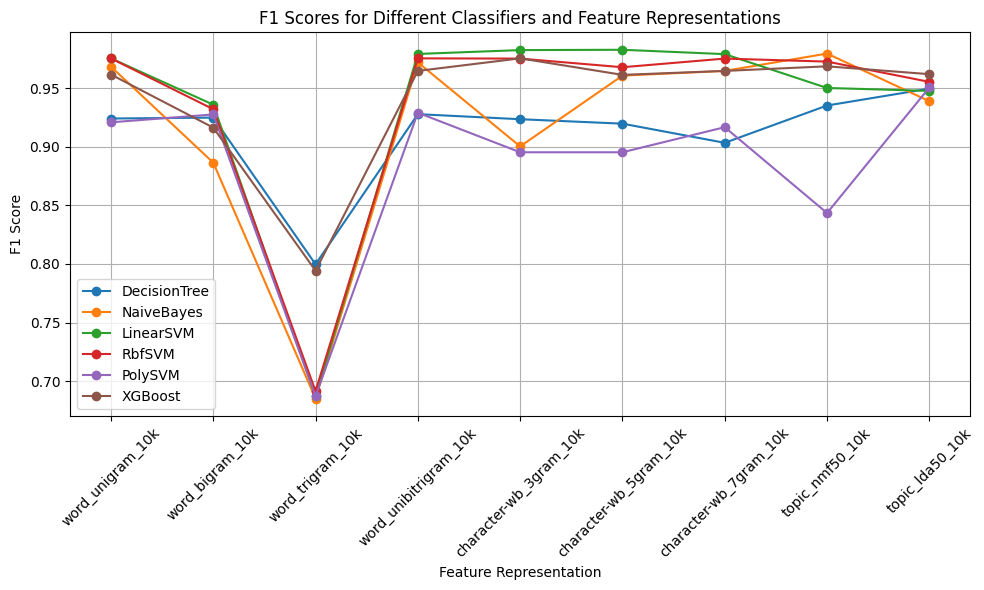

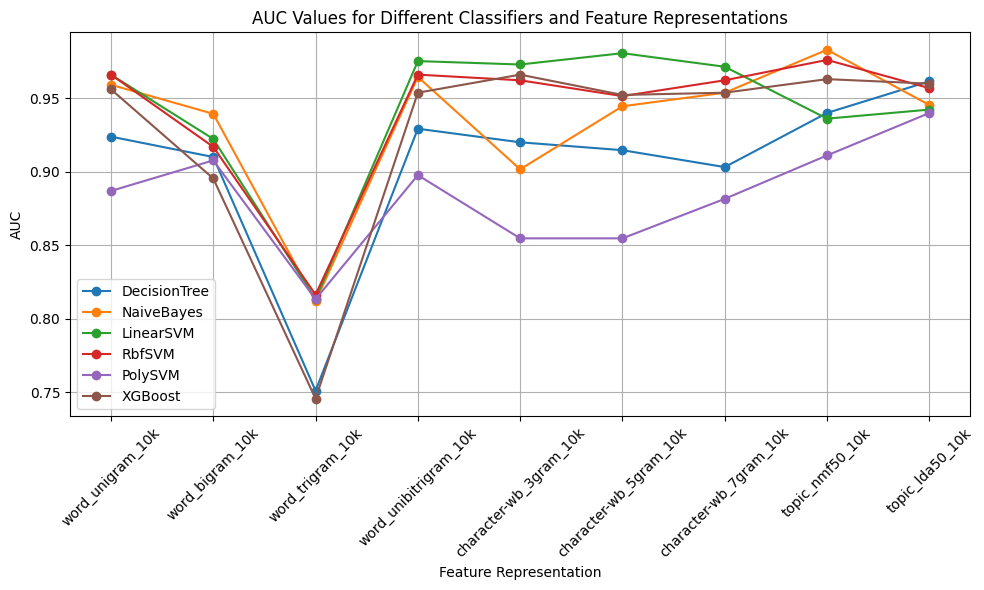

In [ ]:
import matplotlib.pyplot as plt
# binary classification
data = {
    "DecisionTree": {
        "F1": [0.92404064318832, 0.9248408620292967, 0.7997138769670958, 0.9277706349141355, 0.923449098621421, 0.9196546647703171, 0.9033244549669528, 0.935142515787677, 0.9495479334673382],
        "AUC": [0.92404064318832, 0.9101805267, 0.7511591200, 0.9294169872, 0.92019335109, 0.9148170070, 0.9033244549, 0.94016967544, 0.9616750517]
    },
    "NaiveBayes": {
        "F1": [0.9683095934741237, 0.8864026783821519, 0.6851516647468597, 0.9719429506663549, 0.9002546863099967, 0.9606309277296317, 0.9646464646464646, 0.9794413261976244, 0.9387854251012147],
        "AUC": [0.9593074874, 0.9395777843, 0.8119266055, 0.9646838315, 0.9017954029, 0.9447075071, 0.9539311433, 0.9831311038, 0.9455460195]
    },
    "LinearSVM": {
        "F1": [0.9753519060354295, 0.9358430360840491, 0.6872863978127136, 0.9791224814422057, 0.9823942185967354, 0.9826696925933567, 0.9789572129997661, 0.9501001391764825, 0.9476008683284677],
        "AUC": [0.9662128834, 0.9224622669, 0.8134556574, 0.9754365196, 0.9731182795, 0.9808128637, 0.9715892275, 0.9362730590, 0.9424385912]
    },
    "RbfSVM": {
        "F1": [0.9753519060354295, 0.9319988751693637, 0.6915620180656532, 0.9753519060354295, 0.9751519198100052, 0.9677889408696987, 0.9751519198100052, 0.9725884349301658, 0.9552865835182744],
        "AUC": [0.9662128834, 0.9170859228, 0.8165137614, 0.9662128834, 0.9623655913, 0.9516129032, 0.9623655913, 0.9762257078, 0.9570385715]
    },
    "PolySVM": {
        "F1": [0.9208080808080807, 0.9275137206171689, 0.6872863978127136, 0.9289978734952087, 0.8952705510763861, 0.8952705510763861, 0.9166546399191802, 0.8434323896606295, 0.9505050505050505],
        "AUC": [0.8870967741, 0.9078622866, 0.8134556574, 0.8978494623, 0.8548387096, 0.8548387096, 0.8817204301, 0.9112656604, 0.9401203511]
    },
    "XGBoost": {
        "F1": [0.961573970107543, 0.9162846322503488, 0.7942857142857143, 0.9646464646464646, 0.9753519060354295, 0.9612672809128179, 0.9646464646464646, 0.9685605209970806, 0.9618733237053848],
        "AUC": [0.95624938344, 0.8955805465, 0.7457827759, 0.9539311433, 0.9662128834, 0.9524020913, 0.9539311433, 0.9631547795, 0.9600966755]
    }
}

# Feature representations
features = ["word_unigram_10k", "word_bigram_10k", "word_trigram_10k", "word_unibitrigram_10k", "character-wb_3gram_10k", "character-wb_5gram_10k", "character-wb_7gram_10k", "topic_nmf50_10k", "topic_lda50_10k"]

# Plot F1 scores for each classifier
plt.figure(figsize=(10, 6))
for classifier, metrics in data.items():
    plt.plot(features, metrics["F1"], marker='o', label=classifier)

plt.title("F1 Scores for Different Classifiers and Feature Representations")
plt.xlabel("Feature Representation")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot AUC values for each classifier
plt.figure(figsize=(10, 6))
for classifier, metrics in data.items():
    plt.plot(features, metrics["AUC"], marker='o', label=classifier)

plt.title("AUC Values for Different Classifiers and Feature Representations")
plt.xlabel("Feature Representation")
plt.ylabel("AUC")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Machine Learning Results for multi class classification using the best results from the previous section:


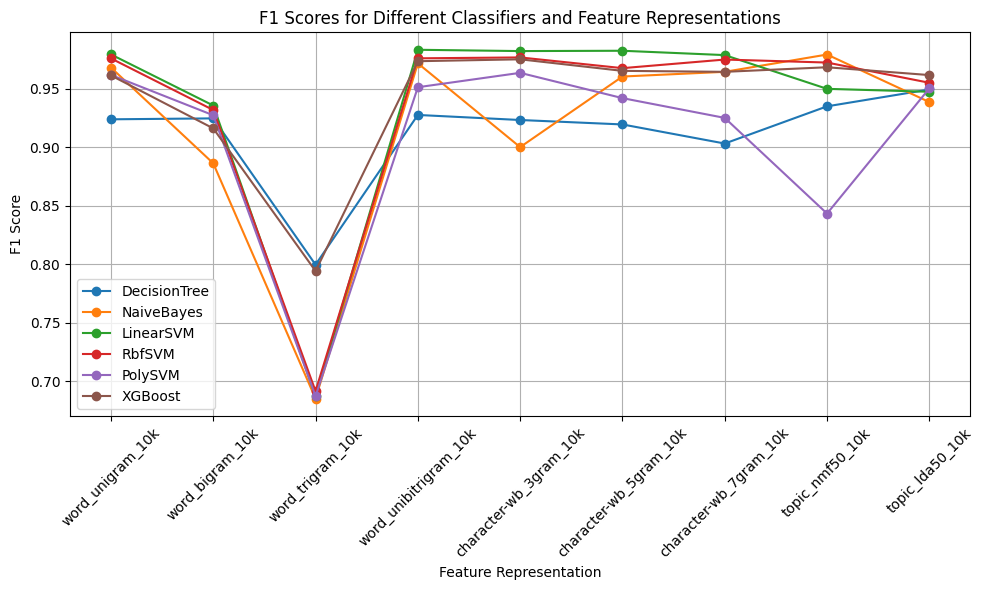

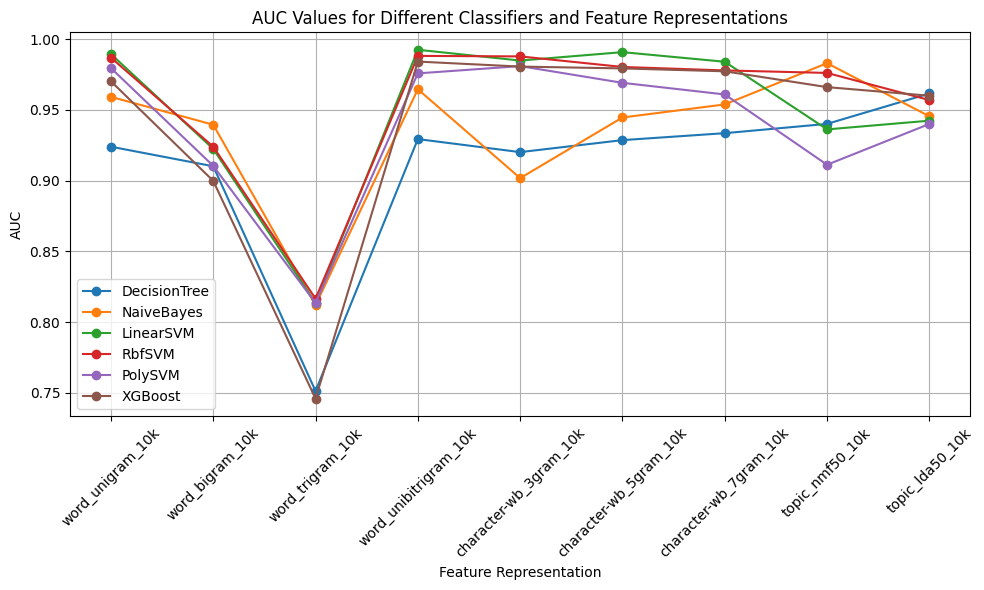

In [ ]:
# multi class classification

import matplotlib.pyplot as plt

# Best Results data
best_results = {
    "DecisionTree": {
        "word_unigram_10k": {"F1": 0.92404064318832, "AUC": 0.92404064318832},
        "word_bigram_10k": {"F1": 0.9248408620292967, "AUC": 0.9101805267},
        "word_trigram_10k": {"F1": 0.7997138769670958, "AUC": 0.7511591200},
        "word_unibitrigram_10k": {"F1": 0.9277706349141355, "AUC": 0.9294169872},
        "character-wb_3gram_10k": {"F1": 0.923449098621421, "AUC": 0.92019335109},
        "character-wb_5gram_10k": {"F1": 0.9196546647703171, "AUC": 0.9286828616},
        "character-wb_7gram_10k": {"F1": 0.9033244549669528, "AUC": 0.9336003313},
        "topic_nmf50_10k": {"F1": 0.935142515787677, "AUC": 0.94016967544},
        "topic_lda50_10k": {"F1": 0.9495479334673382, "AUC": 0.9616750517}
    },
    "NaiveBayes": {
        "word_unigram_10k": {"F1": 0.9683095934741237, "AUC": 0.9593074874},
        "word_bigram_10k": {"F1": 0.8864026783821519, "AUC": 0.9395777843},
        "word_trigram_10k": {"F1": 0.6851516647468597, "AUC": 0.8119266055},
        "word_unibitrigram_10k": {"F1": 0.9719429506663549, "AUC": 0.9646838315},
        "character-wb_3gram_10k": {"F1": 0.9002546863099967, "AUC": 0.9017954029},
        "character-wb_5gram_10k": {"F1": 0.9606309277296317, "AUC": 0.9447075071},
        "character-wb_7gram_10k": {"F1": 0.9646464646464646, "AUC": 0.9539311433},
        "topic_nmf50_10k": {"F1": 0.9794413261976244, "AUC": 0.9831311038},
        "topic_lda50_10k": {"F1": 0.9387854251012147, "AUC": 0.9455460195}
    },
    "LinearSVM": {
        "word_unigram_10k": {"F1": 0.9795408090988202, "AUC": 0.9895466386},
        "word_bigram_10k": {"F1": 0.9358430360840491, "AUC": 0.9224622669},
        "word_trigram_10k": {"F1": 0.6872863978127136, "AUC": 0.8134556574},
        "word_unibitrigram_10k": {"F1": 0.9835079846118979, "AUC": 0.9926046622},
        "character-wb_3gram_10k": {"F1": 0.9823942185967354, "AUC": 0.9849785842},
        "character-wb_5gram_10k": {"F1": 0.9826696925933567, "AUC": 0.9909272428},
        "character-wb_7gram_10k": {"F1": 0.9789572129997661, "AUC": 0.9841319576},
        "topic_nmf50_10k": {"F1": 0.9501001391764825, "AUC": 0.9362730590},
        "topic_lda50_10k": {"F1": 0.9476008683284677, "AUC": 0.9424385912}
    },
    "RbfSVM": {
        "word_unigram_10k": {"F1": 0.9761475239736109, "AUC": 0.9870193191},
        "word_bigram_10k": {"F1": 0.9319988751693637, "AUC": 0.9240294307},
        "word_trigram_10k": {"F1": 0.6915620180656532, "AUC": 0.8165137614},
        "word_unibitrigram_10k": {"F1": 0.976189149015236, "AUC": 0.98827826429},
        "character-wb_3gram_10k": {"F1": 0.9769634720029347, "AUC": 0.9879203687},
        "character-wb_5gram_10k": {"F1": 0.9677889408696987, "AUC": 0.9804519682},
        "character-wb_7gram_10k": {"F1": 0.9751519198100052, "AUC": 0.9779941697},
        "topic_nmf50_10k": {"F1": 0.9725884349301658, "AUC": 0.9762257078},
        "topic_lda50_10k": {"F1": 0.9552865835182744, "AUC": 0.9570385715}
    },
    "PolySVM": {
        "word_unigram_10k": {"F1": 0.9620130615353546, "AUC": 0.9796494527},
        "word_bigram_10k": {"F1": 0.9275137206171689, "AUC": 0.9104548970},
        "word_trigram_10k": {"F1": 0.6872863978127136, "AUC": 0.8134556574},
        "word_unibitrigram_10k": {"F1": 0.9514804639804639, "AUC": 0.9759049599},
        "character-wb_3gram_10k": {"F1": 0.9637837027410981, "AUC": 0.9810540054},
        "character-wb_5gram_10k": {"F1": 0.9421556067631491, "AUC": 0.9692211367},
        "character-wb_7gram_10k": {"F1": 0.9252520689293945, "AUC": 0.9609975797},
        "topic_nmf50_10k": {"F1": 0.8434323896606295, "AUC": 0.9112656604},
        "topic_lda50_10k": {"F1": 0.9505050505050505, "AUC": 0.9401203511}
    },
    "XGBoost": {
        "word_unigram_10k": {"F1": 0.961573970107543, "AUC": 0.97030048394},
        "word_bigram_10k": {"F1": 0.9162846322503488, "AUC": 0.8998485607},
        "word_trigram_10k": {"F1": 0.7942857142857143, "AUC": 0.7457827759},
        "word_unibitrigram_10k": {"F1": 0.9737297369966532, "AUC": 0.9842542230},
        "character-wb_3gram_10k": {"F1": 0.9753519060354295, "AUC": 0.9807171414},
        "character-wb_5gram_10k": {"F1": 0.9654769406314928, "AUC": 0.9794206385},
        "character-wb_7gram_10k": {"F1": 0.9646464646464646, "AUC": 0.9773751727},
        "topic_nmf50_10k": {"F1": 0.9685605209970806, "AUC": 0.9661846078},
        "topic_lda50_10k": {"F1": 0.9618733237053848, "AUC": 0.9600966755}
    }
}

# Feature representations
features = list(best_results["DecisionTree"].keys())

# Plot F1 scores for each classifier
plt.figure(figsize=(10, 6))
for classifier, feature_results in best_results.items():
    f1_scores = [result["F1"] for result in feature_results.values()]
    plt.plot(features, f1_scores, marker='o', label=classifier)

plt.title("F1 Scores for Different Classifiers and Feature Representations")
plt.xlabel("Feature Representation")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot AUC values for each classifier
plt.figure(figsize=(10, 6))
for classifier, feature_results in best_results.items():
    auc_values = [result["AUC"] for result in feature_results.values()]
    plt.plot(features, auc_values, marker='o', label=classifier)

plt.title("AUC Values for Different Classifiers and Feature Representations")
plt.xlabel("Feature Representation")
plt.ylabel("AUC")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Deep Learning Model Hypterparameter tuning:**

14/14 [==============================] - 2s 59ms/step


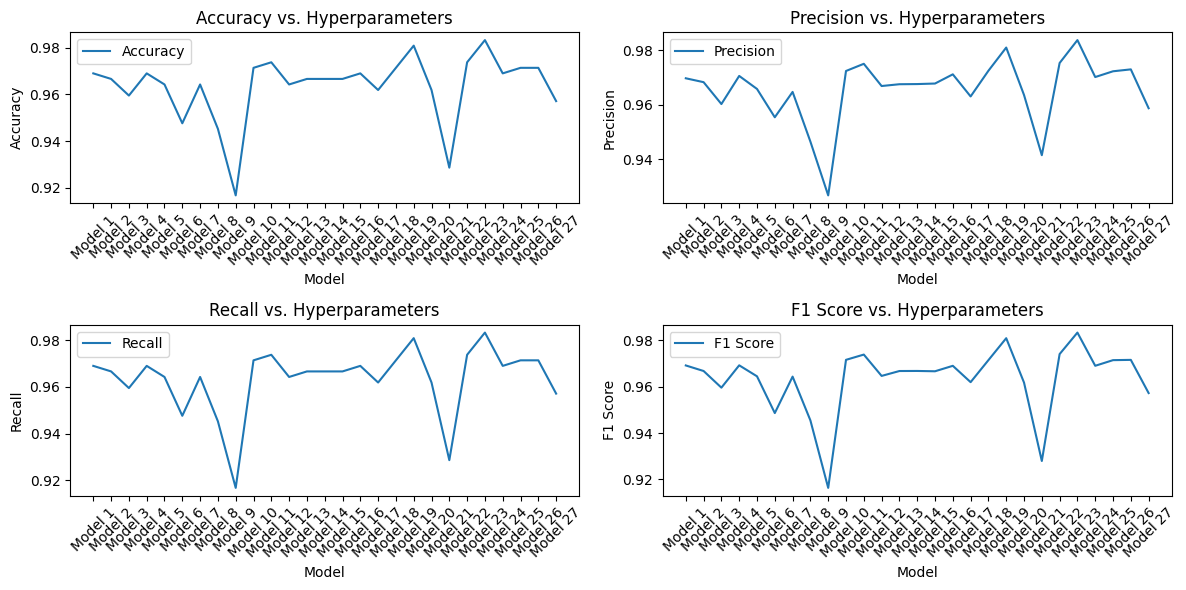

    embedding_dim  lstm_units  dropout_rate  accuracy  precision    recall  \
0              50          32           0.3  0.969048   0.969705  0.969048   
1              50          32           0.5  0.966667   0.968283  0.966667   
2              50          32           0.7  0.959524   0.960280  0.959524   
3              50          64           0.3  0.969048   0.970565  0.969048   
4              50          64           0.5  0.964286   0.965806  0.964286   
5              50          64           0.7  0.947619   0.955444  0.947619   
6              50         128           0.3  0.964286   0.964718  0.964286   
7              50         128           0.5  0.945238   0.946534  0.945238   
8              50         128           0.7  0.916667   0.926862  0.916667   
9             100          32           0.3  0.971429   0.972377  0.971429   
10            100          32           0.5  0.973810   0.975004  0.973810   
11            100          32           0.7  0.964286   0.966875

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay


# Preprocess data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Tweet'])
sequences = tokenizer.texts_to_sequences(df['Tweet'])
max_len = max([len(s) for s in sequences])
word_index = tokenizer.word_index
X = pad_sequences(sequences, maxlen=max_len)
y = LabelEncoder().fit_transform(df['Topic'])  # Convert labels to numerical values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model architecture function
def create_model(num_classes, embedding_dim=100, lstm_units=64, dropout_rate=0.5):
    model = Sequential()
    model.add(Embedding(len(word_index) + 1, embedding_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(lstm_units)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning
embedding_dims = [50, 100, 200]
lstm_units_list = [32, 64, 128]
dropout_rates = [0.3, 0.5, 0.7]
results = []

for embedding_dim in embedding_dims:
    for lstm_units in lstm_units_list:
        for dropout_rate in dropout_rates:
            model = create_model(num_classes=len(np.unique(y)), embedding_dim=embedding_dim, lstm_units=lstm_units, dropout_rate=dropout_rate)
            history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
            score = model.evaluate(X_test, y_test, verbose=0)
            y_pred_prob = model.predict(X_test)  # Get predicted probabilities for each class
            y_pred = np.argmax(y_pred_prob, axis=1)  # Get the class with the highest probability for each prediction
            report = classification_report(y_test, y_pred, output_dict=True)
            results.append({
                'embedding_dim': embedding_dim,
                'lstm_units': lstm_units,
                'dropout_rate': dropout_rate,
                'accuracy': score[1],
                'precision': report['weighted avg']['precision'],
                'recall': report['weighted avg']['recall'],
                'f1_score': report['weighted avg']['f1-score'],
                'auc': roc_auc_score(y_test, y_pred_prob, multi_class='ovr')  # AUC for multi-class
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(12, 6))

# accuracy
plt.subplot(2, 2, 1)
plt.plot(results_df['accuracy'], label='Accuracy')
plt.title('Accuracy vs. Hyperparameters')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(results)), labels=[f"Model {i+1}" for i in range(len(results))], rotation=45)
plt.legend()

# precision
plt.subplot(2, 2, 2)
plt.plot(results_df['precision'], label='Precision')
plt.title('Precision vs. Hyperparameters')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(ticks=range(len(results)), labels=[f"Model {i+1}" for i in range(len(results))], rotation=45)
plt.legend()

# recall
plt.subplot(2, 2, 3)
plt.plot(results_df['recall'], label='Recall')
plt.title('Recall vs. Hyperparameters')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(ticks=range(len(results)), labels=[f"Model {i+1}" for i in range(len(results))], rotation=45)
plt.legend()

# F1 score
plt.subplot(2, 2, 4)
plt.plot(results_df['f1_score'], label='F1 Score')
plt.title('F1 Score vs. Hyperparameters')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(ticks=range(len(results)), labels=[f"Model {i+1}" for i in range(len(results))], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Displaying results
print(results_df)


Storing the results as a Zip file:

In [ ]:
!zip -r /content/results.zip /content/results/